## Basic Sales Summary from a Tiny SQLite Database using Python

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

### Create SQLite database and sample data

#### Creating database

In [2]:
db_name = "sales_data.db"
table_creation_query = """
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
"""

#### Inserting data into the table

In [3]:
sample_data = [
    ("Apple", 10, 2.5),
    ("Banana", 15, 1.0),
    ("Orange", 8, 3.0),
    ("Apple", 5, 2.5),
    ("Banana", 12, 1.0),
    ("Orange", 7, 3.0),
]

#### Connecting and creating table

In [4]:
conn = sqlite3.connect(db_name)
cursor = conn.cursor()
cursor.execute(table_creation_query)

 #### Inserting sample data 

In [5]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sample_data)
conn.commit()

### Run SQL query for summary

#### Executing a query

In [6]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product;
"""

In [7]:
df = pd.read_sql_query(query, conn)

#### Results

In [8]:
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         15     37.5
1  Banana         27     27.0
2  Orange         15     45.0


###  Plot bar chart

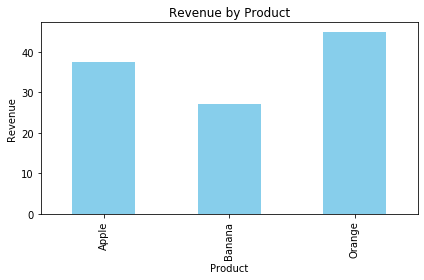

In [9]:
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

#### Cleaning up resources 

In [10]:
conn.close()